In [ ]:
 #  A Whale off the Port(folio)

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [52]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [53]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)

# Sort DF Index
whale_returns_df.sort_index(ascending= False, inplace=True)

# Obtain info for Whale Portfolio
whale_returns_df.describe()

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [54]:
# Count nulls and determine dtypes
# YOUR CODE HERE
whale_returns_df.count()
whale_returns_df.isnull().sum()
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [55]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace=True)

# Confirm Nulls are removed
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [56]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [57]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)

# Sort DF Index
algo_returns_df.sort_index(ascending=False, inplace=True)

# Obtain info for Algo Portfolios
algo_returns_df.describe()

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [58]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.count()
algo_returns_df.isnull().sum()
algo_returns_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [59]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace=True)

# Confirm Nulls are removed
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [60]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)

# Sort DF Index
sp500_history_df.sort_index(ascending=False, inplace=True)

sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [62]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [64]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.astype(float).pct_change()

# Sort SP & 500 Index
sp500_daily_returns.sort_index()

sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [65]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.dropna()

sp500_daily_returns.isnull().sum()

sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [66]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"S&P 500"})

sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis="columns", join="inner")

# Sort DF Index
combined_df.sort_index(inplace=True)

combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

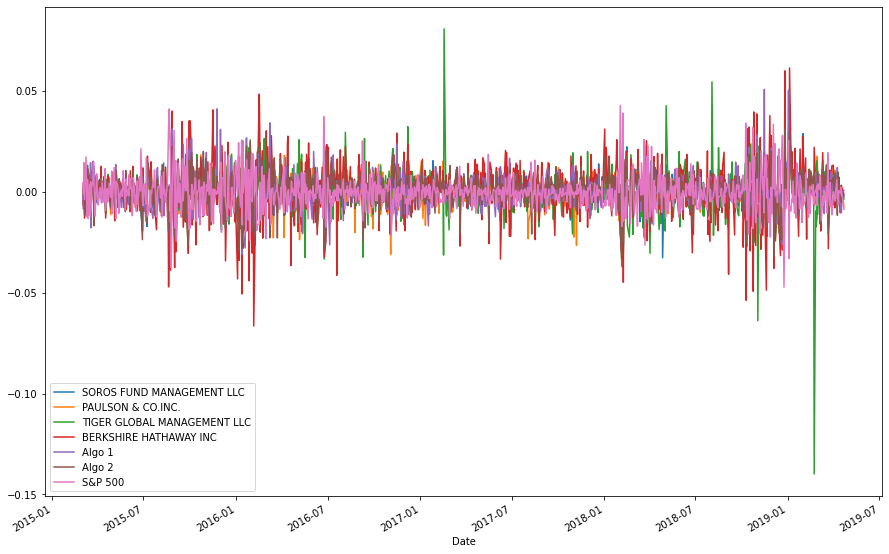

In [68]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(15, 10))

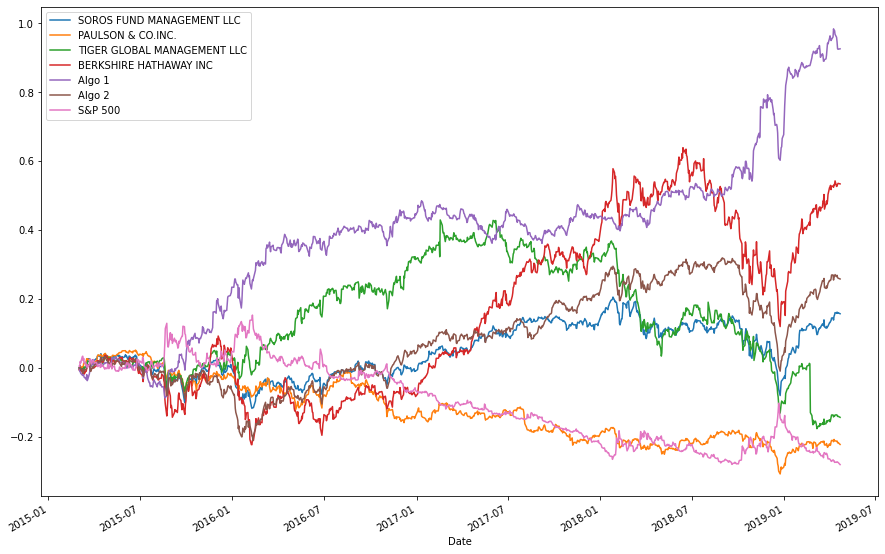

In [69]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

cumulative_returns.plot(figsize=(15,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

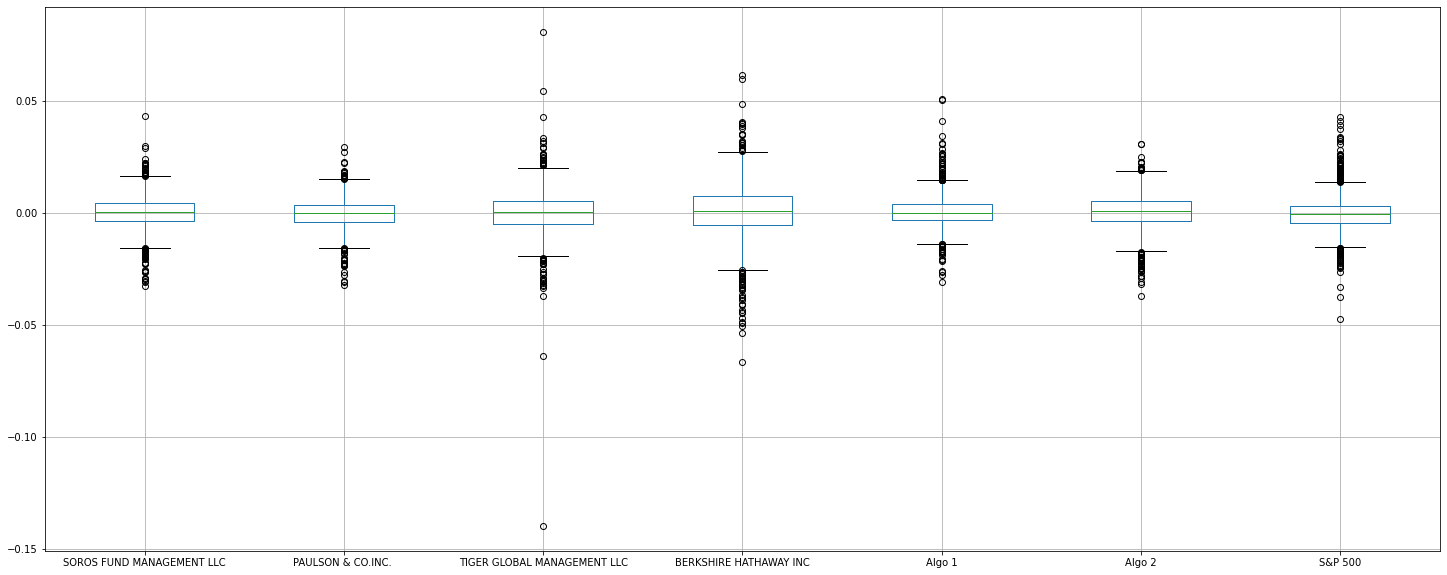

In [70]:
# Box plot to visually show risk of daily returns
# YOUR CODE HERE
combined_df.boxplot(figsize=(25,10))

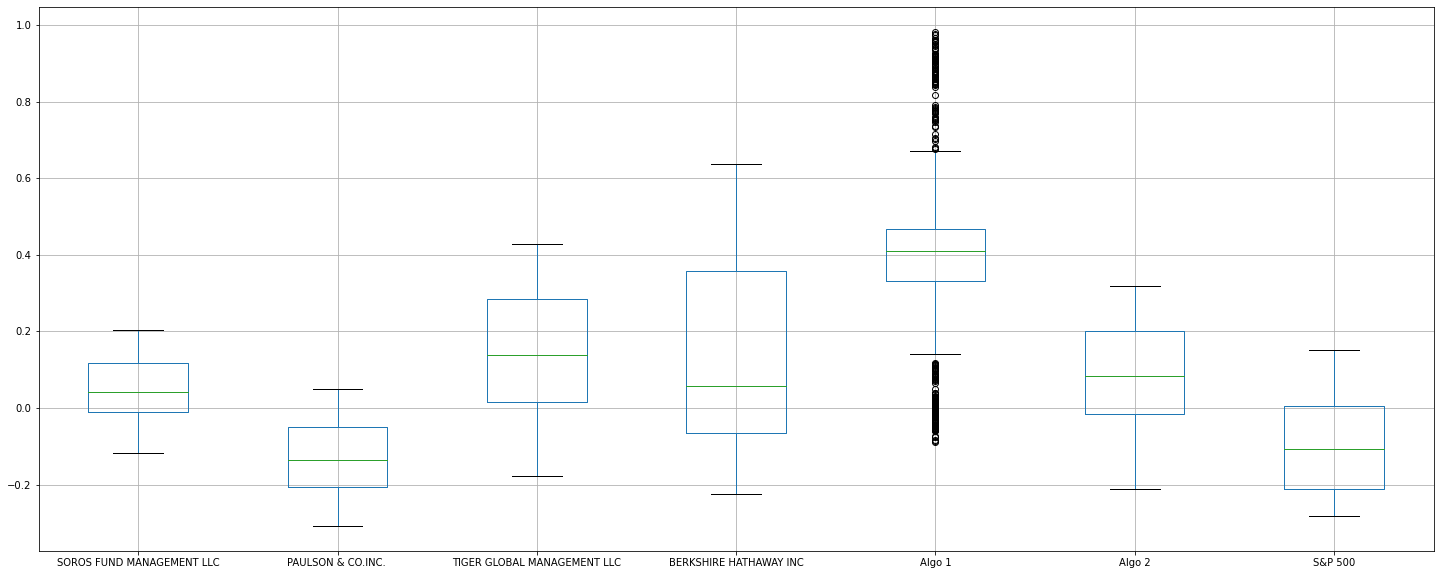

In [71]:
# Box plot to visually show risk of cumulative returns
# YOUR CODE HERE
cumulative_returns.boxplot(figsize=(25,10))

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio.
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_standard_deviations = combined_df.std()

# Determine risk levels for each portfolio 
daily_standard_deviations.sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [22]:
# Calculate annualized standard deviations for each portfolio
annualized_standard_deviation = combined_df.std()*np.sqrt(252)

# Determine risk levels for each portfolio 
annualized_standard_deviation.sort_values(inplace=True)

annualized_standard_deviation

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

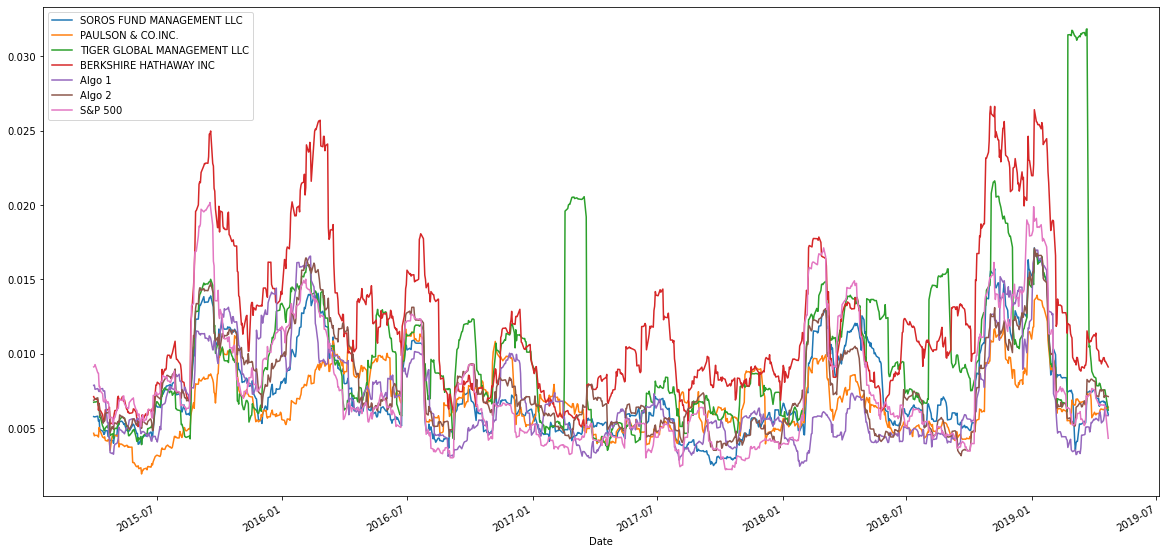

In [23]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 trading day window
# YOUR CODE HERE
combined_move21 = combined_df.rolling(window=21).std()
combined_move21.plot(figsize=(20,10))

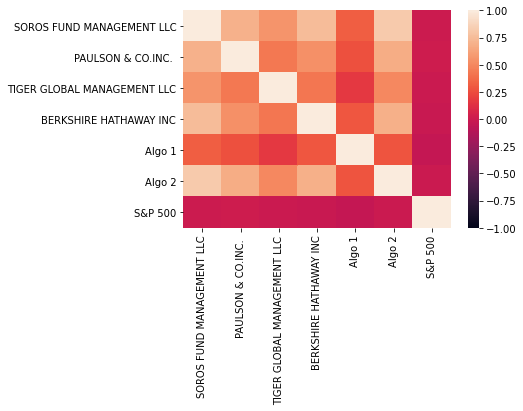

In [24]:
# Correlation 
# YOUR CODE HERE
correlation_combined_df = combined_df.corr()
correlation_combined_df

# Construct a correlation table
sns.heatmap(correlation_combined_df, vmin=-1, vmax=1)

In [25]:
# Do any portfolio returns closely track the S&P 500?
correlation_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


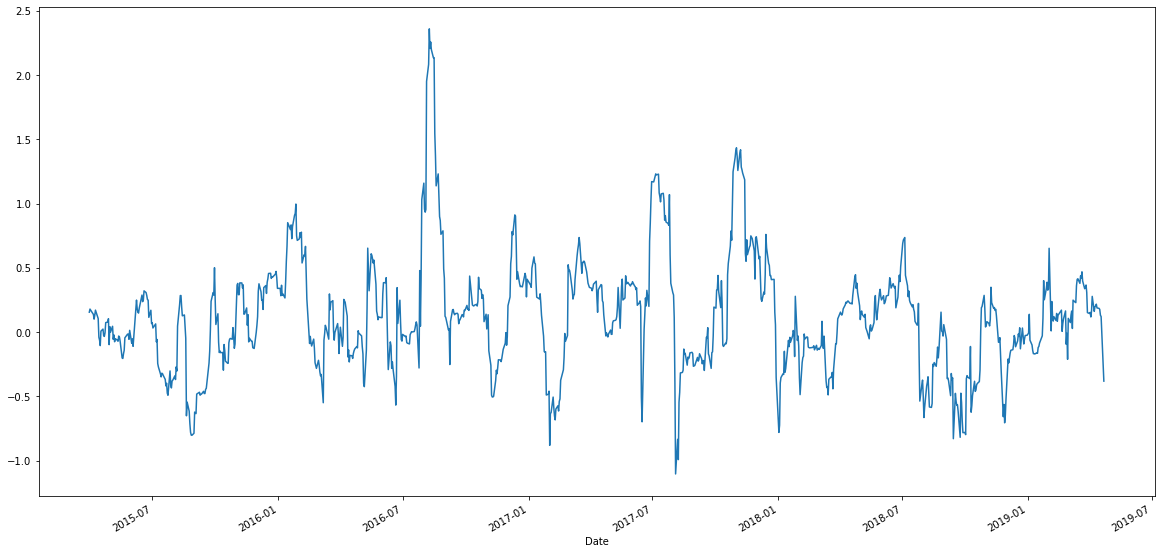

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing: Select Berkshire Hathaway)
# YOUR CODE HERE
rolling_berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=21).cov(combined_df["S&P 500"])
                                                                                    
rolling_variance_sp500 = combined_df["S&P 500"].rolling(window=21).var()
                                                                                    
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_variance_sp500
                                                                                    
rolling_berkshire_beta.plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [27]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios_combined = combined_df.mean()/ combined_df.std()
sharpe_ratios_combined

annualized_sharpe_ratios_combined = sharpe_ratios_combined*np.sqrt(252)
annualized_sharpe_ratios_combined

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

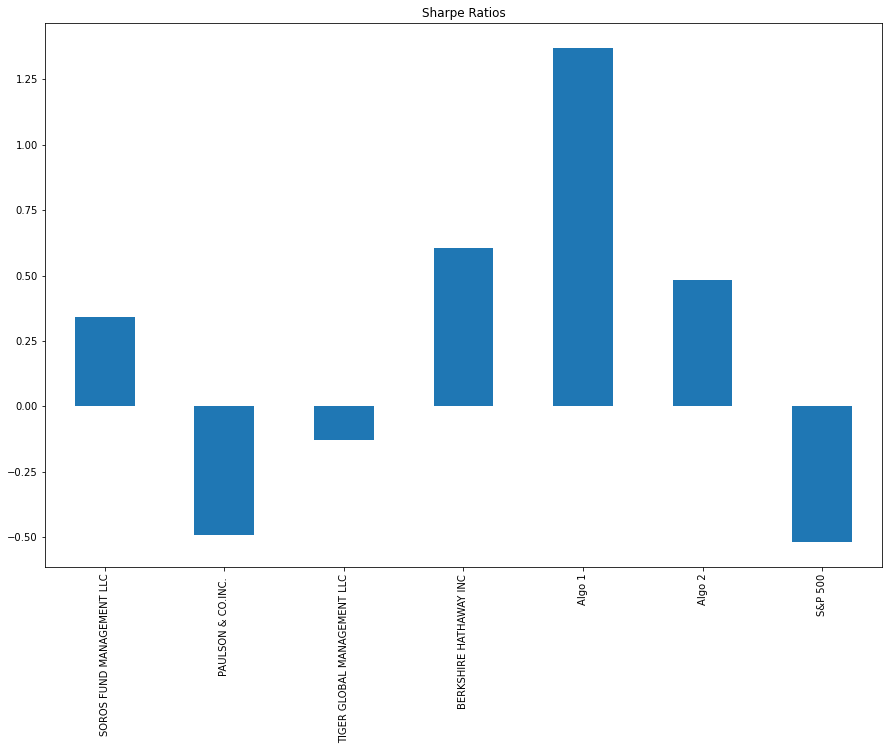

In [28]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
annualized_sharpe_ratios_combined.plot(kind="bar", title="Sharpe Ratios", figsize=(15, 10))

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

In [29]:
print("Algo 1 portfolio outperforms")

Algo 1 portfolio outperforms


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock - Johnson and Johnson (jnj)
# YOUR CODE HERE
jnj_cprice_csv = Path("Resources/jnj_cprice.csv")
jnj_cprice_df = pd.read_csv(jnj_cprice_csv, parse_dates=True, infer_datetime_format=True)

jnj_cprice_df["Date"] = pd.to_datetime(jnj_cprice_df['Date']).dt.normalize()

jnj_cprice_df.set_index(pd.to_datetime(jnj_cprice_df['Date'], infer_datetime_format=True), inplace=True)
jnj_cprice_df.drop(columns=["Date"], inplace=True)

jnj_cprice_df.head()

,Close
Date,
2015-01-02,104.52
2015-01-05,103.79
2015-01-06,103.28
2015-01-07,105.56
2015-01-08,106.39


In [31]:
# Read the second stock - Amazon (amzn)
# YOUR CODE HERE
amzn_cprice_csv = Path("Resources/amzn_cprice.csv")
amzn_cprice_df = pd.read_csv(amzn_cprice_csv, parse_dates=True, infer_datetime_format=True)

amzn_cprice_df["Date"] = pd.to_datetime(amzn_cprice_df['Date']).dt.normalize()

amzn_cprice_df.set_index(pd.to_datetime(amzn_cprice_df['Date'], infer_datetime_format=True), inplace=True)
amzn_cprice_df.drop(columns=["Date"], inplace=True)

amzn_cprice_df.head() 

,Close
Date,
2015-01-02,308.52
2015-01-05,302.19
2015-01-06,295.29
2015-01-07,298.42
2015-01-08,300.46


In [32]:
# Read the third stock - PayPAL (pypl)
# YOUR CODE HERE
pypl_cprice_csv = Path("Resources/pypl_cprice.csv")
pypl_cprice_df = pd.read_csv(pypl_cprice_csv, parse_dates=True, infer_datetime_format=True)

pypl_cprice_df["Date"] = pd.to_datetime(pypl_cprice_df['Date']).dt.normalize()

pypl_cprice_df.set_index(pd.to_datetime(pypl_cprice_df['Date'], infer_datetime_format=True), inplace=True)
pypl_cprice_df.drop(columns=["Date"], inplace=True)

pypl_cprice_df.head() 

,Close
Date,
2015-07-06,36.71
2015-07-07,36.62
2015-07-08,34.70
2015-07-09,34.50
2015-07-10,34.69


In [33]:
# Concatenate all custom portfolio stocks into a single DataFrame
# YOUR CODE HERE
mf_portfolio_df = pd.concat([jnj_cprice_df, amzn_cprice_df, pypl_cprice_df], axis="columns", join="inner")
mf_portfolio_df.sort_index(inplace=True)

mf_portfolio_df

,Close,Close,Close
Date,,,
2015-07-06,98.20,436.04,36.71
2015-07-07,98.92,436.72,36.62
2015-07-08,97.77,429.70,34.70
2015-07-09,98.40,434.39,34.50
2015-07-10,99.53,443.51,34.69
...,...,...,...
2019-12-23,146.44,1793.00,108.61
2019-12-24,145.93,1789.21,108.69
2019-12-26,145.83,1868.77,109.75


In [34]:
# Replace column names for custom portfolio stocks
columns = ["JNJ", "AMZN", "PYPL"]
mf_portfolio_df.columns = columns
mf_portfolio_df.head()

,JNJ,AMZN,PYPL
Date,,,
2015-07-06,98.20,436.04,36.71
2015-07-07,98.92,436.72,36.62
2015-07-08,97.77,429.70,34.70
2015-07-09,98.40,434.39,34.50
2015-07-10,99.53,443.51,34.69


In [35]:
# Reset the index
mf_portfolio_df.reset_index()

,Date,JNJ,AMZN,PYPL
0,2015-07-06,98.20,436.04,36.71
1,2015-07-07,98.92,436.72,36.62
2,2015-07-08,97.77,429.70,34.70
3,2015-07-09,98.40,434.39,34.50
4,2015-07-10,99.53,443.51,34.69
...,...,...,...,...
1126,2019-12-23,146.44,1793.00,108.61
1127,2019-12-24,145.93,1789.21,108.69
1128,2019-12-26,145.83,1868.77,109.75
1129,2019-12-27,145.75,1869.80,109.40


In [36]:
# Clean the Data
# Check and Drop Nulls
mf_portfolio_df.isnull()
mf_portfolio_df.dropna(inplace=True)
mf_portfolio_df.isnull().sum()
mf_portfolio_df

,JNJ,AMZN,PYPL
Date,,,
2015-07-06,98.20,436.04,36.71
2015-07-07,98.92,436.72,36.62
2015-07-08,97.77,429.70,34.70
2015-07-09,98.40,434.39,34.50
2015-07-10,99.53,443.51,34.69
...,...,...,...
2019-12-23,146.44,1793.00,108.61
2019-12-24,145.93,1789.21,108.69
2019-12-26,145.83,1868.77,109.75


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# Determine unweighted returns
mf_portfolio_daily_returns = mf_portfolio_df.pct_change()
mf_portfolio_daily_returns

# Determine weighted returns
mf_portfolio_wtdreturns = mf_portfolio_daily_returns.dot(weights)
mf_portfolio_wtdreturns

Date
2015-07-06         NaN
2015-07-07    0.002147
2015-07-08   -0.026710
2015-07-09    0.003865
2015-07-10    0.012662
                ...   
2019-12-23    0.001651
2019-12-24   -0.001620
2019-12-26    0.017845
2019-12-27   -0.001062
2019-12-30   -0.009470
Length: 1131, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
total_combinedport_df = pd.concat([mf_portfolio_wtdreturns, combined_df], axis='columns', join='inner')
total_combinedport_df

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-07-06,NaN,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.006044
2015-07-07,0.002147,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.016935
2015-07-08,-0.026710,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.002257
2015-07-09,0.003865,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,-0.012188
2015-07-10,0.012662,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,-0.010945
...,...,...,...,...,...,...,...,...
2019-04-15,0.000606,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.007130,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.003405,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [39]:
# Rename Custom portfolio column
# YOUR CODE HERE
total_combinedport_df.rename(columns= {0: "Custom Portfolio"}, inplace=True)
total_combinedport_df

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-07-06,NaN,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.006044
2015-07-07,0.002147,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.016935
2015-07-08,-0.026710,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.002257
2015-07-09,0.003865,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,-0.012188
2015-07-10,0.012662,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,-0.010945
...,...,...,...,...,...,...,...,...
2019-04-15,0.000606,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.007130,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.003405,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_combinedport_df.dropna(inplace=True)
total_combinedport_df.sort_index()
total_combinedport_df

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-07-07,0.002147,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.016935
2015-07-08,-0.026710,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.002257
2015-07-09,0.003865,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,-0.012188
2015-07-10,0.012662,0.008969,0.003589,0.013605,0.007015,0.003362,0.014381,-0.010945
2015-07-13,0.031625,0.007946,0.001149,0.008658,0.010178,0.004215,0.008575,-0.004438
...,...,...,...,...,...,...,...,...
2019-04-15,0.000606,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.007130,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.003405,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


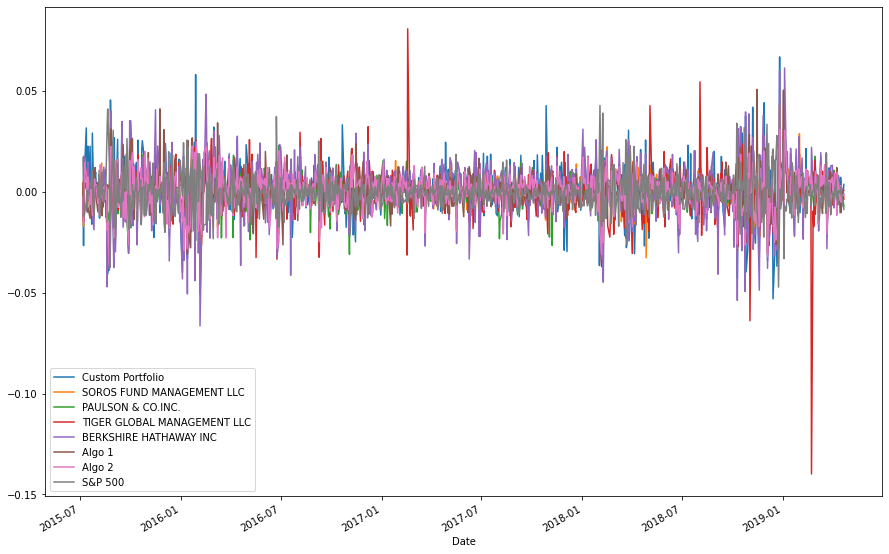

In [41]:
# Plot Daily Total Portfolio Returns
total_combinedport_df.plot(figsize=(15, 10))

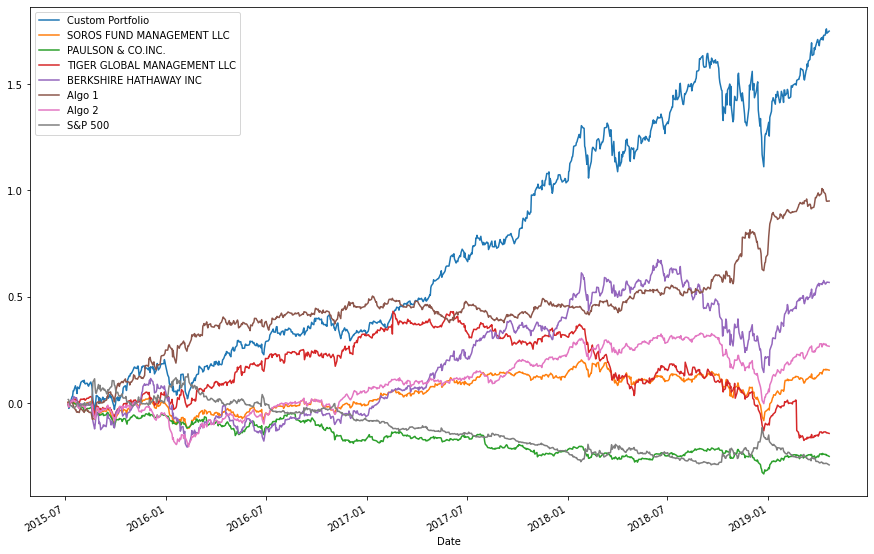

In [42]:
# Plot Cumulative Daily Total Portfolio Returns
cumulative_total_portfolio_returns = (1+ total_combinedport_df).cumprod() -1
cumulative_total_portfolio_returns.head()

cumulative_total_portfolio_returns.plot(figsize=(15, 10))

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

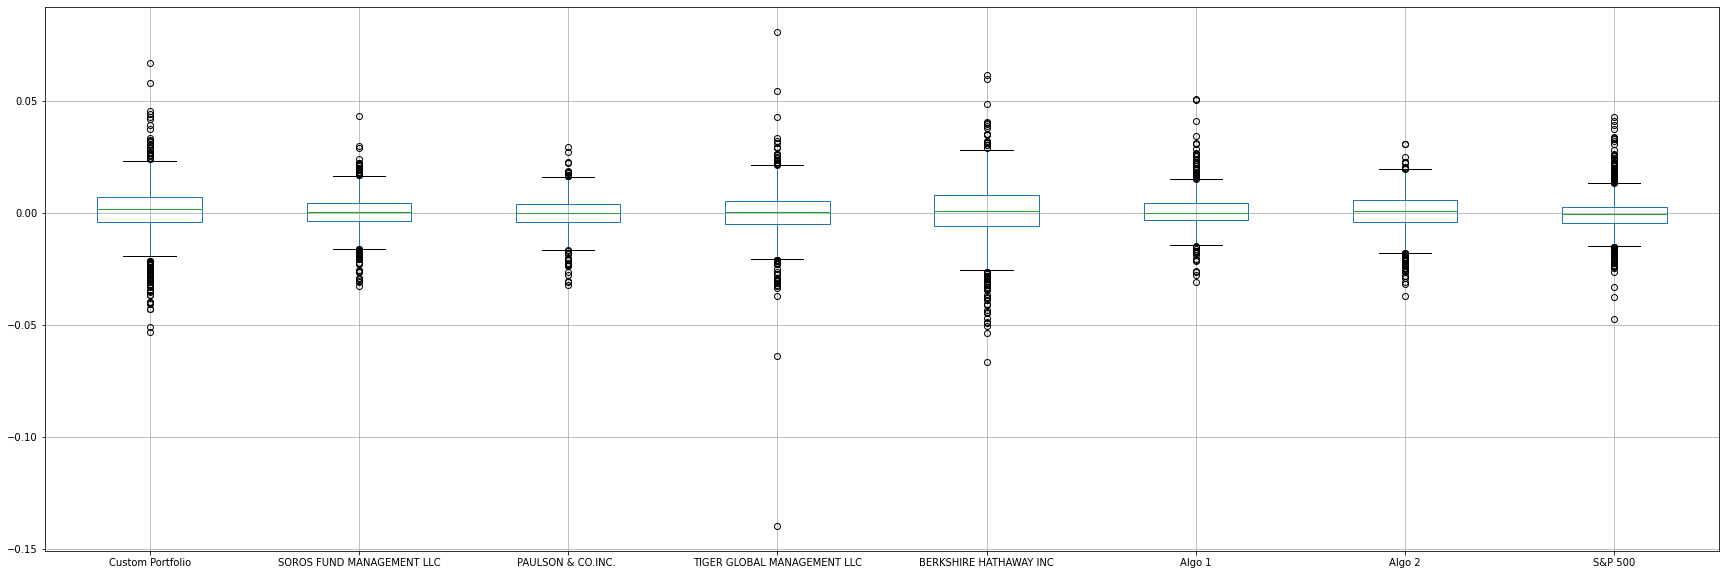

In [43]:
# Risk
# YOUR CODE HERE
total_combinedport_df.boxplot(figsize=(30,10))

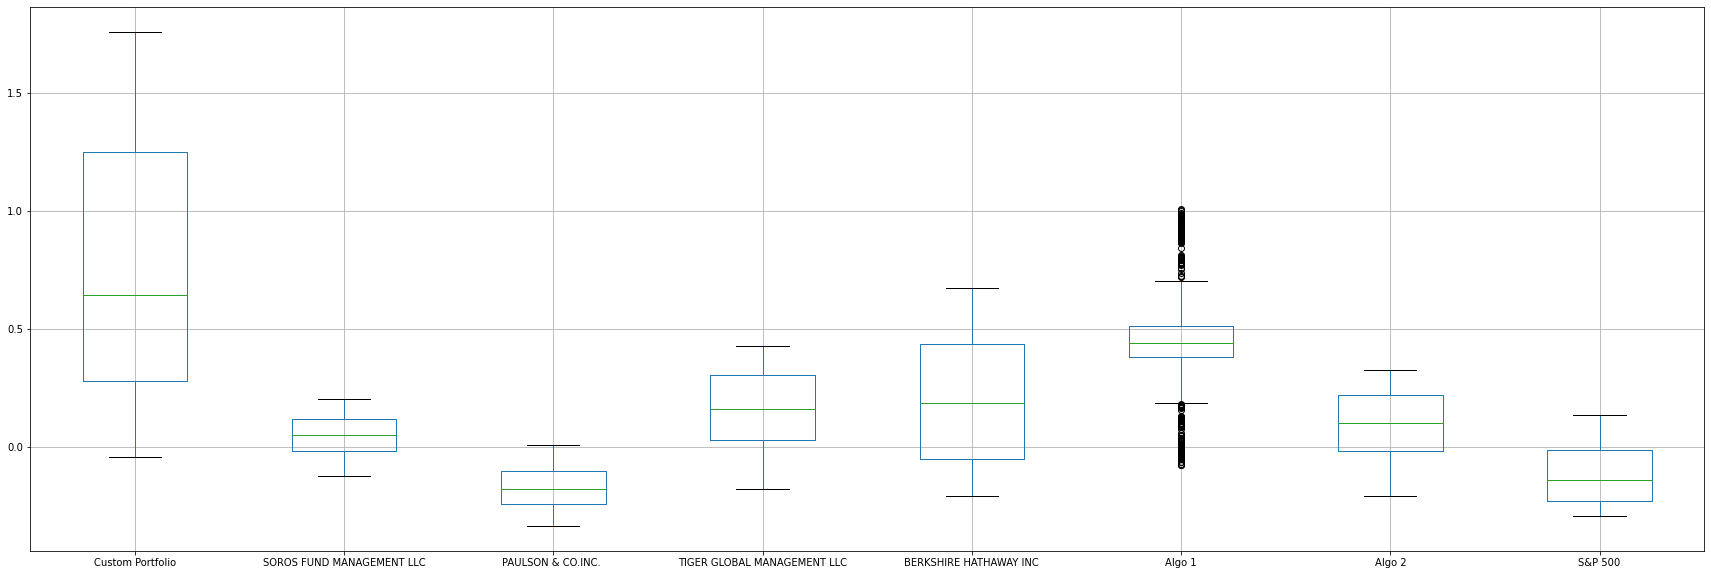

In [44]:
cumulative_total_portfolio_returns.boxplot(figsize=(30,10))

In [45]:
# Risk
# Determine Annualized Standard Deviation for Total Combined Portfolio
annualized_standard_deviation_combined = total_combinedport_df.std()*np.sqrt(252)

annualized_standard_deviation_combined.sort_values(inplace=True)

annualized_standard_deviation_combined 

PAULSON & CO.INC.              0.115104
Algo 1                         0.123424
SOROS FUND MANAGEMENT LLC      0.128469
Algo 2                         0.135238
S&P 500                        0.138334
TIGER GLOBAL MANAGEMENT LLC    0.178719
Custom Portfolio               0.194981
BERKSHIRE HATHAWAY INC         0.211805
dtype: float64

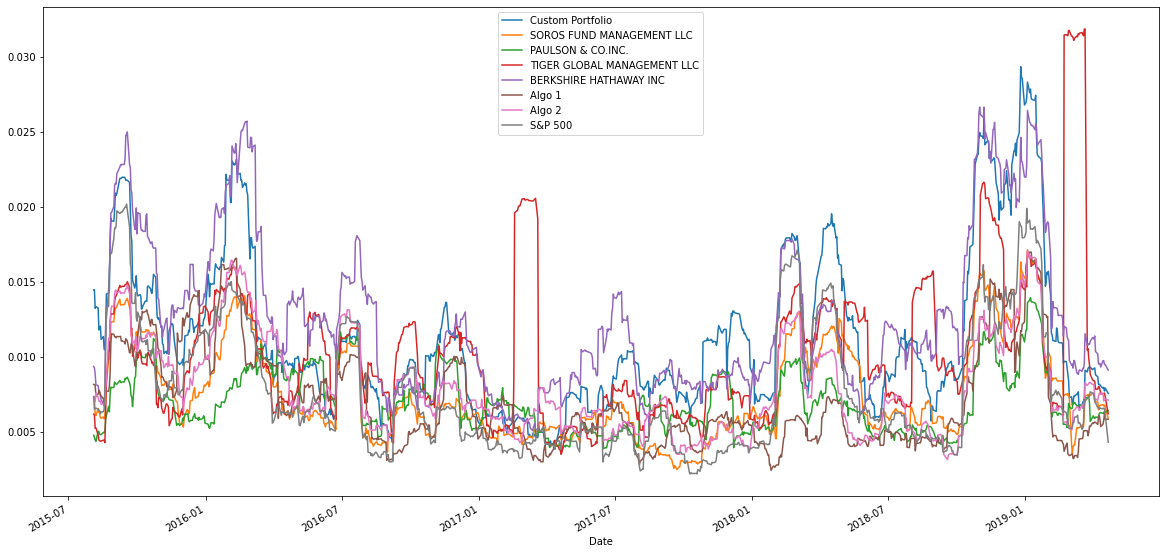

In [46]:
# Rolling Statistics for Totoal Combined Portfolio
# Determine 21-day Moving Average
total_combinedport_df.rolling(window=21).std().plot(figsize=(20, 10))

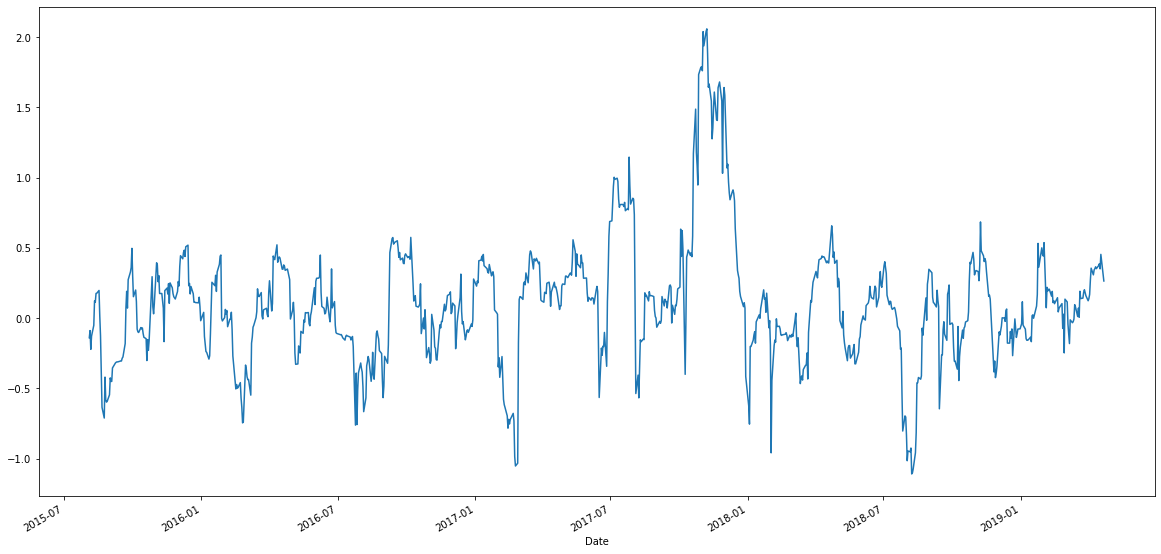

In [47]:
# Beta - Rolling 21 day
# YOUR CODE HERE
# Total Combined Portfolio and S&P 500 covariance (21 day)
total_combinedport_covariance = total_combinedport_df['Custom Portfolio'].rolling(window=21).cov(total_combinedport_df['S&P 500'])

# Rolling 21 day variance of S&P 500
rolling_variance_sp500 = total_combinedport_df['S&P 500'].rolling(window=21).var()

# Calculate and Plot Custom Portfolio Rolling Beta 21 days
total_combinedport_beta = total_combinedport_covariance / rolling_variance_sp500
total_combinedport_beta.plot(figsize=(20, 10))

In [48]:
# Calculate Annualized Sharpe Ratios
# Your Code Here
annualized_sharpe_ratios_tcp = total_combinedport_df.mean()* 252/ (total_combinedport_df.std() * np.sqrt(252))
annualized_sharpe_ratios_tcp

Custom Portfolio               1.466716
SOROS FUND MANAGEMENT LLC      0.360160
PAULSON & CO.INC.             -0.603109
TIGER GLOBAL MANAGEMENT LLC   -0.136251
BERKSHIRE HATHAWAY INC         0.666149
Algo 1                         1.489834
Algo 2                         0.529822
S&P 500                       -0.585725
dtype: float64

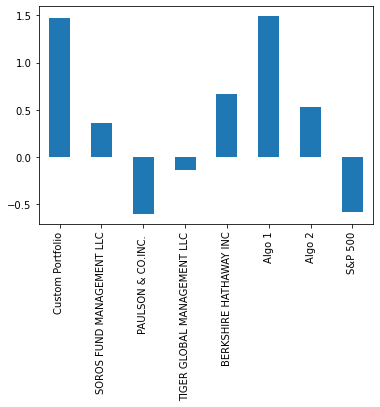

In [49]:
# Create Visual for Sharpe Ratios - bar plot
annualized_sharpe_ratios_tcp.plot(kind='bar')

In [50]:
# Correlation Analysis
correlation_tcp = total_combinedport_df.corr()
correlation_tcp

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Custom Portfolio,1.000000,0.660887,0.515068,0.468477,0.702023,0.245093,0.626749,-0.014448
SOROS FUND MANAGEMENT LLC,0.660887,1.000000,0.699777,0.554150,0.753524,0.326531,0.827241,-0.000312
PAULSON & CO.INC.,0.515068,0.699777,1.000000,0.427899,0.543223,0.277495,0.679259,0.014393
TIGER GLOBAL MANAGEMENT LLC,0.468477,0.554150,0.427899,1.000000,0.416688,0.166161,0.497090,-0.009155
BERKSHIRE HATHAWAY INC,0.702023,0.753524,0.543223,0.416688,1.000000,0.297278,0.685695,-0.016540
Algo 1,0.245093,0.326531,0.277495,0.166161,0.297278,1.000000,0.298945,-0.038877
Algo 2,0.626749,0.827241,0.679259,0.497090,0.685695,0.298945,1.000000,-0.011205
S&P 500,-0.014448,-0.000312,0.014393,-0.009155,-0.016540,-0.038877,-0.011205,1.000000


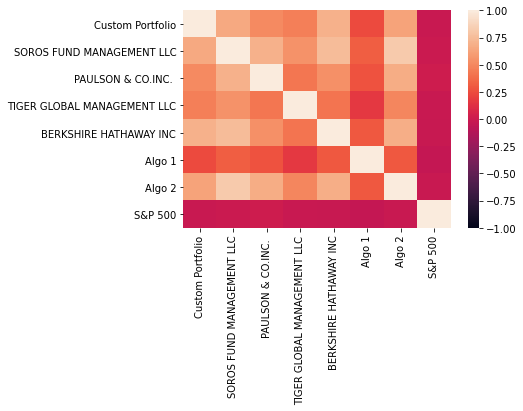

In [51]:
# Create heatmap
sns.heatmap(correlation_tcp, vmin=-1, vmax=1)